In [1]:
#dataset link https://www.kaggle.com/datasets/msambare/fer2013

import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fer2013


In [2]:
# STEP 1: Install TensorFlow (optional in Colab, already included)
# !pip install tensorflow

# STEP 2: Import Libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from os import walk  # Only for counting images



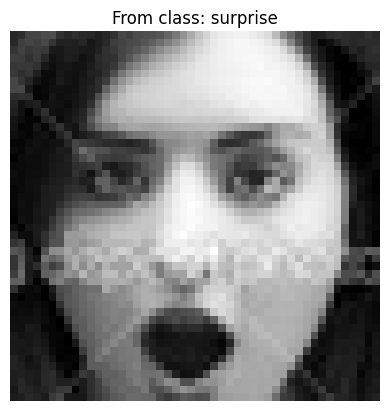

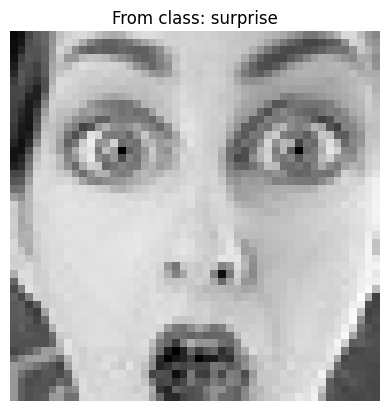

In [12]:
# STEP 3: Set Dataset Paths
train_data = '/kaggle/input/fer2013/train'
test_data = '/kaggle/input/fer2013/test'



#priview the images

import matplotlib.pyplot as plt
import os
from PIL import Image

# Manually pick a class and image
sample_class = os.listdir(train_data)[0]  # e.g., 'Surprise' for 0 index
sample_class_path = os.path.join(train_data, sample_class)

# List image files inside the class folder
image_files = os.listdir(sample_class_path)

# Load and display the first 2 images
for i in range(2):
    img_path = os.path.join(sample_class_path, image_files[i])
    img = Image.open(img_path).convert('L')  # convert to grayscale
    plt.imshow(img, cmap='gray')
    plt.title(f"From class: {sample_class}")
    plt.axis('off')
    plt.show()



In [13]:
# STEP 4: Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    test_data,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [14]:
# STEP 5: Model Definition
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))  # 7 output classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,489,095 (9.50 MB)

 Trainable params: 2,489,095 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# STEP 6: Count Number of Images
def count_images(folder_path):
    return sum(len(files) for _, _, files in walk(folder_path))

num_train_imgs = count_images(train_data)
num_test_imgs = count_images(test_data)

print("Number of training images:", num_train_imgs)
print("Number of test images:", num_test_imgs)



Number of training images: 28709
Number of test images: 7178


In [16]:
# STEP 7: Train the Model
epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_imgs // 32,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_test_imgs // 32
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.2539 - loss: 1.8124

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 140s 147ms/step - accuracy: 0.2539 - loss: 1.8123 - val_accuracy: 0.3126 - val_loss: 1.6925
Epoch 2/20
  1/897 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.1875 - loss: 1.8695

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1875 - loss: 1.8695 - val_accuracy: 0.3136 - val_loss: 1.6888
Epoch 3/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 99s 45ms/step - accuracy: 0.3142 - loss: 1.6953 - val_accuracy: 0.4160 - val_loss: 1.5067
Epoch 4/20
  1/897 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.2500 - loss: 1.7711

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2500 - loss: 1.7711 - val_accuracy: 0.4149 - val_loss: 1.5082
Epoch 5/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.3842 - loss: 1.5684 - val_accuracy: 0.4572 - val_loss: 1.3979
Epoch 6/20
  1/897 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.2812 - loss: 1.5800

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2812 - loss: 1.5800 - val_accuracy: 0.4566 - val_loss: 1.3975
Epoch 7/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.4140 - loss: 1.4940 - val_accuracy: 0.4587 - val_loss: 1.3936
Epoch 8/20
  1/897 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.3125 - loss: 1.5695

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3125 - loss: 1.5695 - val_accuracy: 0.4601 - val_loss: 1.3844
Epoch 9/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.4510 - loss: 1.4185 - val_accuracy: 0.5116 - val_loss: 1.2564
Epoch 10/20
  1/897 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.4375 - loss: 1.4114

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4375 - loss: 1.4114 - val_accuracy: 0.5120 - val_loss: 1.2572
Epoch 11/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.4763 - loss: 1.3735 - val_accuracy: 0.5361 - val_loss: 1.2147
Epoch 12/20
  1/897 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.5000 - loss: 1.3499

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5000 - loss: 1.3499 - val_accuracy: 0.5336 - val_loss: 1.2164
Epoch 13/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.4877 - loss: 1.3371 - val_accuracy: 0.5321 - val_loss: 1.2144
Epoch 14/20
  1/897 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.5312 - loss: 1.3906

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5312 - loss: 1.3906 - val_accuracy: 0.5329 - val_loss: 1.2139
Epoch 15/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.4980 - loss: 1.3164 - val_accuracy: 0.5434 - val_loss: 1.1883
Epoch 16/20
  1/897 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.6562 - loss: 0.9885

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6562 - loss: 0.9885 - val_accuracy: 0.5455 - val_loss: 1.1892
Epoch 17/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.5064 - loss: 1.2956 - val_accuracy: 0.5490 - val_loss: 1.1769
Epoch 18/20
  1/897 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.5625 - loss: 1.1502

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5625 - loss: 1.1502 - val_accuracy: 0.5490 - val_loss: 1.1792
Epoch 19/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.5066 - loss: 1.2804 - val_accuracy: 0.5576 - val_loss: 1.1619
Epoch 20/20
  1/897 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.4062 - loss: 1.4053

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4062 - loss: 1.4053 - val_accuracy: 0.5585 - val_loss: 1.1598


In [ ]:
# STEP 8: Save the Trained Model
model.save('/content/model_file.h5')

In [ ]:
# STEP 9: Plot Training and Validation Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
